In [1]:
# for mathematical operation 
import numpy as np

# for dataframe operations
import pandas as pd

# for data visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# lets select a background style
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16,7)

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual



# Reading the data

In [2]:
# Importing data
data = pd.read_csv('startup_funding.csv')

# changing the names of the column inside the data
data.columns = ['SNo','Date','StartupName','IndustryVertical','SubVertical',
               'City','InvestorsName','InvestmentType','AmountInUSD','Remarks']

# lets clean the string
def clean_string(x):
    return str(x).replace('\\xc2\\xa0','').replace('\\\\xc2\\\\xa0','')

# lets apply function to clean the data
for col in ['StartupName','IndustryVertical','SubVertical','City',
           'InvestorsName','InvestmentType','AmountInUSD','Remarks']:
     data[col] = data[col].apply(lambda x: clean_string(x))

# lets cheak the head of the data
data.head()


,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [3]:
# lets check the column name of the data
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD', 'Remarks'],
      dtype='object')

In [4]:
# lets check the shape of thhe data
print('size of data',data.shape)

size of data (3044, 10)


# Data Cleaning

In [5]:
# missing data

# lets import the warning module
import warnings 
warnings.filterwarnings('ignore')

# lets calculate the total missing values in thhe data
total = data.isnull().sum().sort_values(ascending = False)

# lets calculate the percentage of missing value of data
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)

# lets store the above two values in dataset called missing data
missing_data = pd.concat([total,percent], axis=1, keys=['Total','Percent %'])

# lets check the head of the data
missing_data
                        


,Total,Percent %
Remarks,0,0.0
AmountInUSD,0,0.0
InvestmentType,0,0.0
InvestorsName,0,0.0
City,0,0.0
SubVertical,0,0.0
IndustryVertical,0,0.0
StartupName,0,0.0
Date,0,0.0
SNo,0,0.0


In [6]:
# lets check value in remark column
data["Remarks"].value_counts()

nan                                                         2625
Series A                                                     177
Series B                                                      64
Pre-Series A                                                  37
Series C                                                      28
                                                            ... 
Strategic Investment (Majority Stake)                          1
Series E (Updated from 315M to 400M after Press Release)       1
Govt backed VC Fund                                            1
Incremental Capital                                            1
pre series A                                                   1
Name: Remarks, Length: 70, dtype: int64

In [7]:
# lets remove Remark column as it contains a lot of nan , and high cardinal column

data = data.drop(["Remarks"], axis=1)



In [8]:
# lets check the columns names after removing the Remark column, as it having
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD'],
      dtype='object')

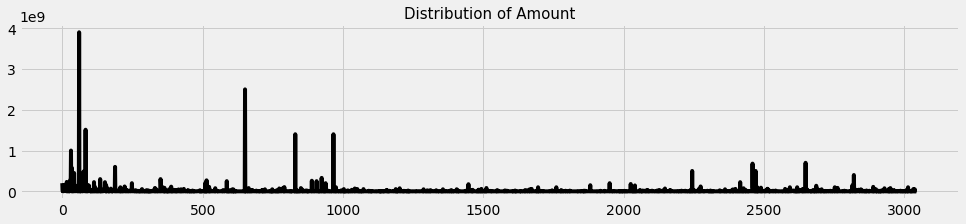

In [9]:
# lets covert the amount column into numerical, so that we can analyze the value inside it

# function to clean the AmountInUSD column
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0','1','2','3','4','5','6','7','8','9']])
    x = str(x).replace(",","").replace("+","")
    x  = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a","")
    if x=="":
        x = '-999'
    return x
# lets apply the function on the columm
data["AmountInUSD"] = data["AmountInUSD"].apply(lambda x:float(clean_amount(x)))

# lets check the head of the column after cleaning it
plt.rcParams['figure.figsize'] = (15,3)
data["AmountInUSD"].plot(kind = 'line' ,color= 'black')
plt.title('Distribution of Amount',fontsize=15)
plt.show()
            
    

In [10]:
# cleaning the dates
data['Date'][data['Date'] == '12/05.2015'] = '12/05/2015'
data['Date'][data['Date'] == '13/04.2015'] = '13/04/2015'
data['Date'][data['Date'] == '15/01.2015'] = '15/01/2015'
data['Date'][data['Date'] == '22/01//2015'] = '22/01/2015'
data['Date'][data['Date'] == '05/072018'] = '05/07/2018'
data['Date'][data['Date'] == '01/07/015'] = '01/07/2015'
data['Date'][data['Date'] == '\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

In [11]:
data['Date']

0       09/01/2020
1       13/01/2020
2       09/01/2020
3       02/01/2020
4       02/01/2020
           ...    
3039    29/01/2015
3040    29/01/2015
3041    30/01/2015
3042    30/01/2015
3043    31/01/2015
Name: Date, Length: 3044, dtype: object

# How  does the Funding Ecosystem changes with respect to the time

Number of Funding per month in decresing order(Top 10)
 201601    104
201602    100
201508     98
201507     98
201606     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


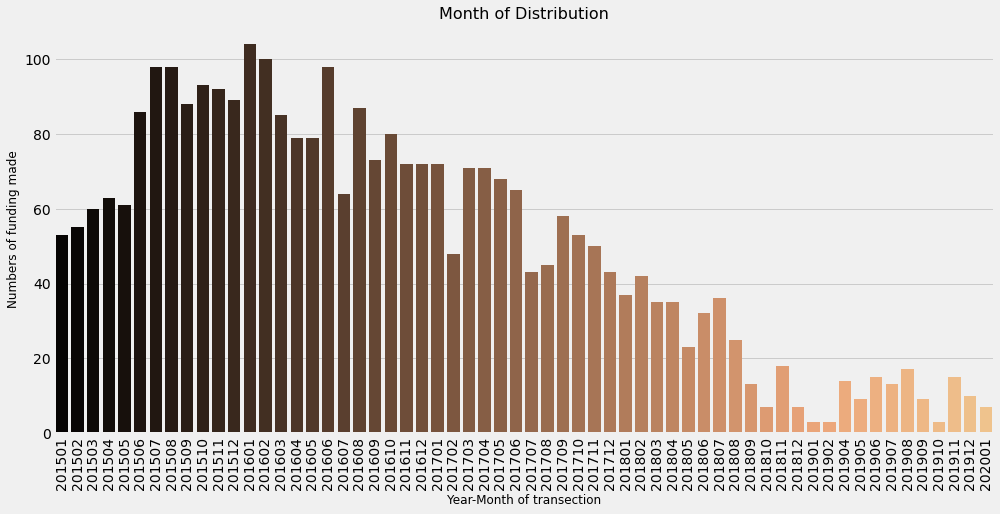

In [12]:
# some of the date formate are written wrongly so we have to clean so that we can analyse these values
# converting them in to Datetime object 
data['yearmonth'] = (pd.to_datetime(data['Date'],
                                   format = '%d/%m/%Y').dt.year*100)+(pd.to_datetime(data['Date'],format='%d/%m/%Y').dt.month)


temp = data['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print('Number of Funding per month in decresing order(Top 10)\n',temp)
year_month = data['yearmonth'].value_counts() 

# lets plot the data
plt.rcParams['figure.figsize'] = (15,7)
sns.barplot(year_month.index,year_month.values,palette='copper')
plt.xticks(rotation = 90)
plt.xlabel("Year-Month of transection",fontsize=12)
plt.ylabel("Numbers of funding made",fontsize=12)
plt.title("Month of Distribution",fontsize=16)
plt.show()

# What is the General Amount that Startups get in India?

In [13]:
# lets check the maximum funding of a startup
print("Maximum Funding to a Startup is : ",data['AmountInUSD'].dropna().sort_values().max())

Maximum Funding to a Startup is :  3900000000.0


In [14]:
# lets check the Startup witth more than 50crore+ funding
@interact
def check(column = 'AmountInUSD',x = 500000000):  #50 crore funding in startup
    return data[data[column]>x].sort_values(by = 'AmountInUSD',ascending = False)

interactive(children=(Text(value='AmountInUSD', description='column'), IntSlider(value=500000000, description=…

In [15]:
# lets check different venture of paytm
data[data.StartupName == 'Paytm']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,201911
251,252,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06,201806
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
1493,1494,30/08/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,201608
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
2890,2891,13/03/2015,Paytm,nan,nan,nan,Ratan Tata,Private Equity,-9.990000e+02,201503
2948,2949,05/02/2015,Paytm,nan,nan,nan,Ant Financial Services (Alipay),Private Equity,-9.990000e+02,201502


In [16]:
# lets check the minimum funding in startup
print("Minimun funding in Satrtup is : ", data['AmountInUSD'].dropna().sort_values().min())

Minimun funding in Satrtup is :  -999.0


In [17]:
# lets check startup with least funding
data[['AmountInUSD','StartupName']].sort_values(by = 'AmountInUSD',ascending=True).head(5)


,AmountInUSD,StartupName
2125,-999.0,Splitkart
1464,-999.0,TAC Security
708,-999.0,FableStreet
709,-999.0,Monsoon Fintech
710,-999.0,MonkeyBox


In [18]:
data[data['AmountInUSD']==9990.0].shape

(0, 10)

In [19]:
# Average funding
print('On average indian startup got funding of : ',data['AmountInUSD'].dropna().sort_values().mean())

On average indian startup got funding of :  13270058.261169514


Total startup funded :  2457
Ola Cabs     8
Swiggy       8
Paytm        7
Medinfi      6
Nykaa        6
UrbanClap    6
NoBroker     6
Meesho       6
Uniphore     5
Flipkart     5
Name: StartupName, dtype: int64


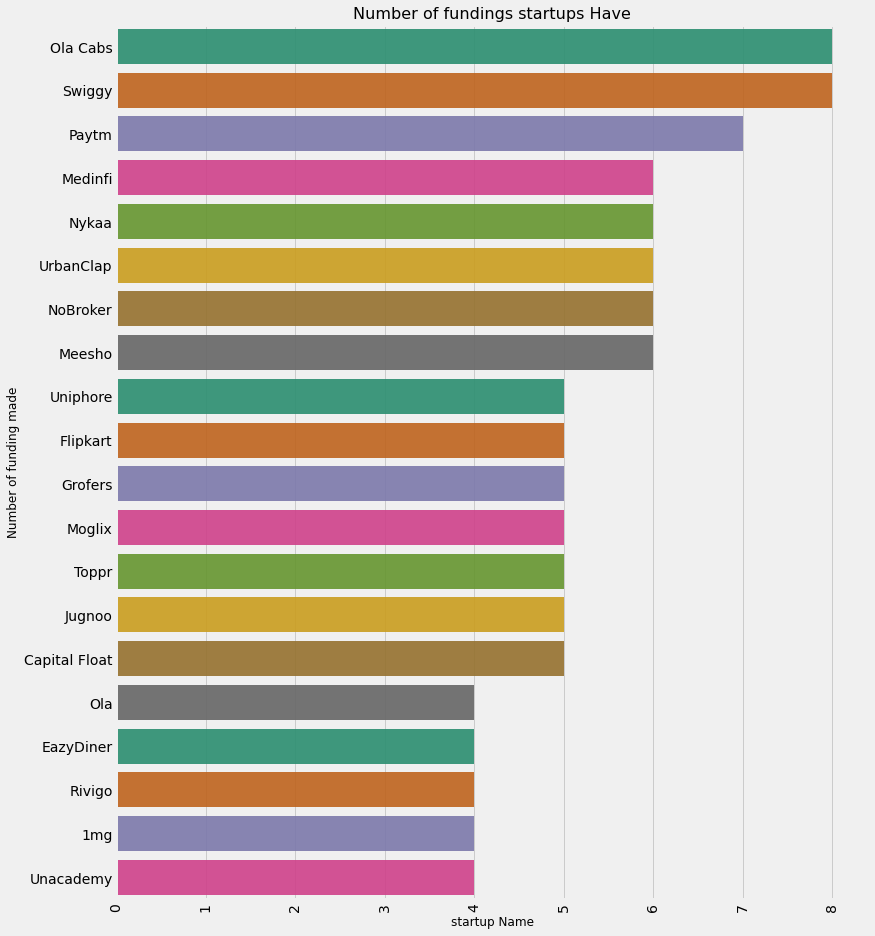

In [32]:
# let check the no. of funding each startup got
print('Total startup funded : ',len(data['StartupName'].unique()))
print(data['StartupName'].value_counts().head(10))
startupname = data['StartupName'].value_counts().head(20)


# lets plot the data
plt.rcParams['figure.figsize'] = (12,15)
sns.barplot(y=startupname.index,x=startupname.values,alpha=0.9,palette='Dark2')
plt.xticks(rotation= 'vertical')
plt.xlabel('startup Name',fontsize=12)
plt.ylabel('Number of funding made',fontsize=12)
plt.title('Number of fundings startups Have',fontsize=16)
plt.show()

# Which kind of Industries are more preferred for Startup?

Consumer Internet      941
Technology             478
eCommerce              186
Consumer Technology    172
Healthcare              70
Finance                 62
ECommerce               61
Logistics               32
E-Commerce              29
Education               24
Name: IndustryVertical, dtype: int64


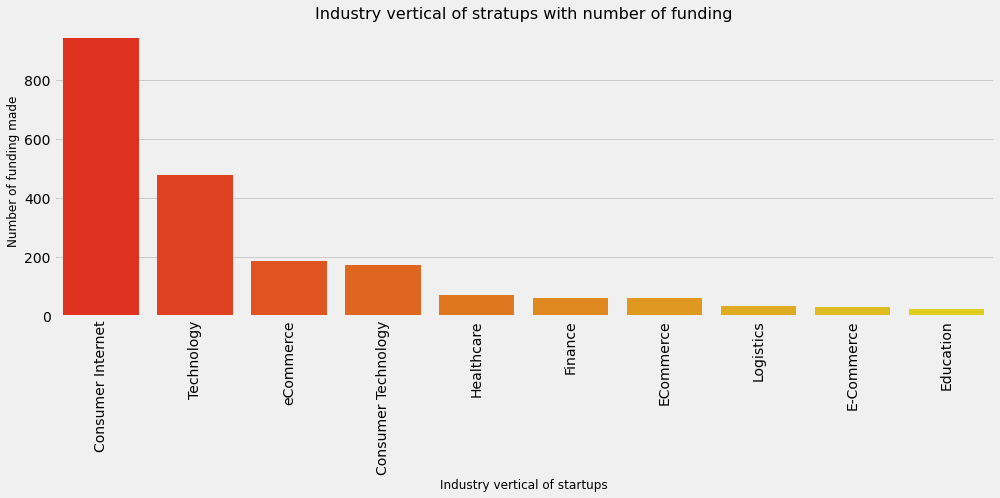

In [35]:
# lets analyze the industry of the startups

# data cleaning
data['IndustryVertical'] = data['IndustryVertical'].replace('nan','Consumer Technology')

industry = data['IndustryVertical'].value_counts().head(10)
print(industry)

# lets plot the data
plt.rcParams['figure.figsize'] = (15,5)
sns.barplot(industry.index,industry.values,palette='autumn')
plt.xticks(rotation = 'vertical')
plt.xlabel('Industry vertical of startups',fontsize=12)
plt.ylabel('Number of funding made',fontsize=12)
plt.title('Industry vertical of stratups with number of funding',fontsize=16)
plt.show()



Online Lending Platform                          11
Online Pharmacy                                  10
Food Delivery Platform                            8
Online Learning Platform                          5
Online lending platform                           5
Online Lending                                    5
Education                                         5
Online Education Platform                         5
Non-Banking Financial Company                     4
Online Food Delivery                              4
Online platform for Higher Education Services     3
Online learning platform                          3
ECommerce Marketplace                             3
Online Insurance Platform                         3
Online Gifting platform                           3
Fitness Mobile App                                3
Online Marketplace                                3
B2B Marketplace                                   3
Logistics                                         3
Agri-tech   

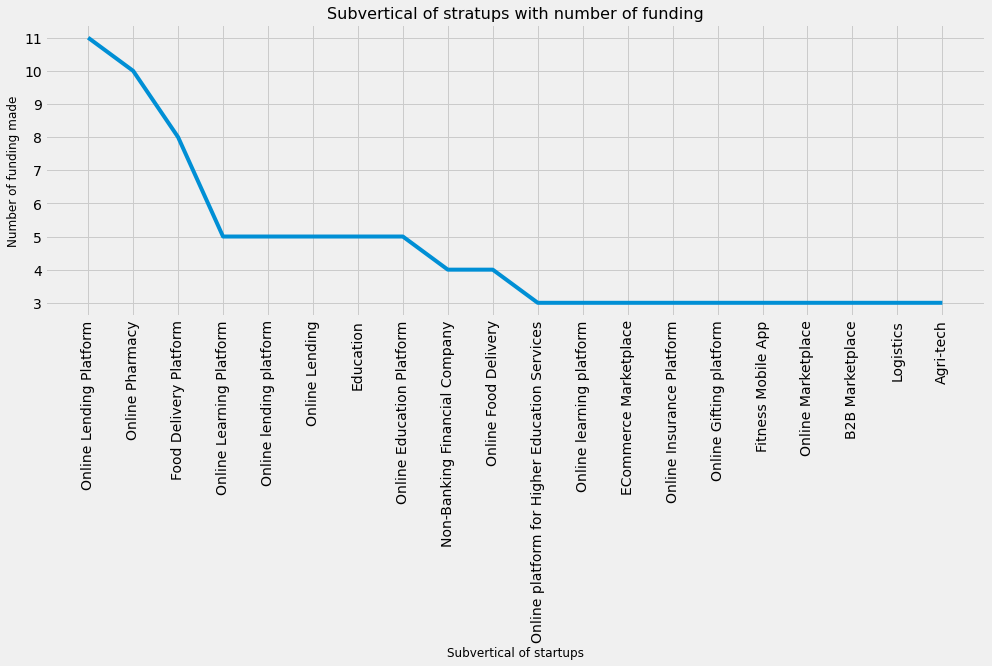

In [37]:
# lets analyze the sub vertical industries
industry = data['SubVertical'].value_counts()[1:].head(20)
print(industry)

#lets plot the data
sns.lineplot(industry.index,industry.values,palette='winter')
plt.xticks(rotation = 'vertical')
plt.xlabel('Subvertical of startups',fontsize=12)
plt.ylabel('Number of funding made',fontsize=12)
plt.title('Subvertical of stratups with number of funding',fontsize=16)
plt.show()



# Does Location also play a role, In dtermining the Growh of a Startup?

Bangalore    701
Mumbai       568
New Delhi    424
Banglore     321
Gurgaon      291
Pune         105
Hyderabad     99
Chennai       97
Noida         93
Gurugram      50
Name: City, dtype: int64


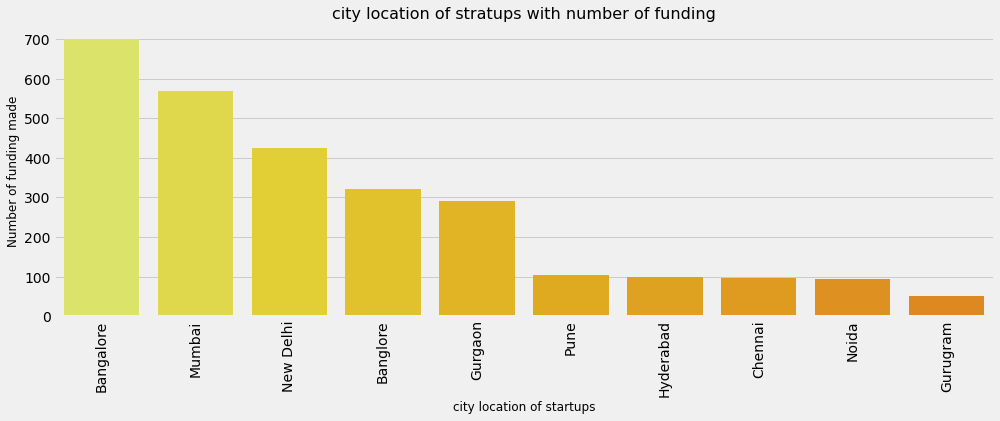

In [40]:
# Analyze the effect of cities on a Startup

# lets clean the data for better analysis
data['City'] = data['City'].replace(('Bengaluru','nan'),('Banglore','Banglore'))

city = data['City'].value_counts().head(10)
print(city)


# lets plot te data
sns.barplot(city.index,city.values,palette='Wistia')
plt.xticks(rotation = 'vertical')
plt.xlabel('city location of startups',fontsize=12)
plt.ylabel('Number of funding made',fontsize=12)
plt.title('city location of stratups with number of funding',fontsize=16)
plt.show()


# who plays the main role in Indian Startups Ecosystem?

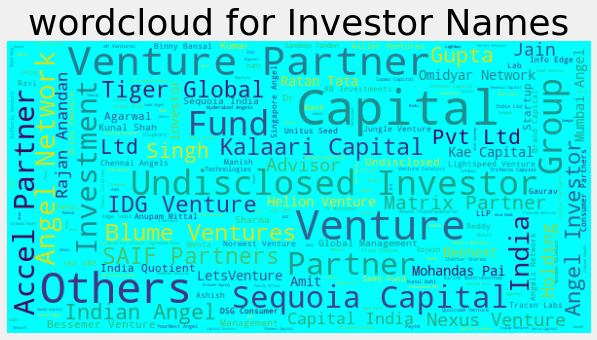

In [42]:
from wordcloud import WordCloud


names = data['InvestorsName'][~pd.isnull(data['InvestorsName'])]
wordcloud = WordCloud(max_font_size=50,width=600,height=300,background_color='cyan').generate(' '.join(names))
plt.imshow(wordcloud)
plt.title('wordcloud for Investor Names',fontsize=36)
plt.axis('off')
plt.show()

Undisclosed Investors       136
Ratan Tata                   25
Indian Angel Network         24
Kalaari Capital              16
Group of Angel Investors     15
Sequoia Capital              15
Accel Partners               12
Brand Capital                11
Venture Catalysts            11
SAIF Partners                10
Name: InvestorsName, dtype: int64


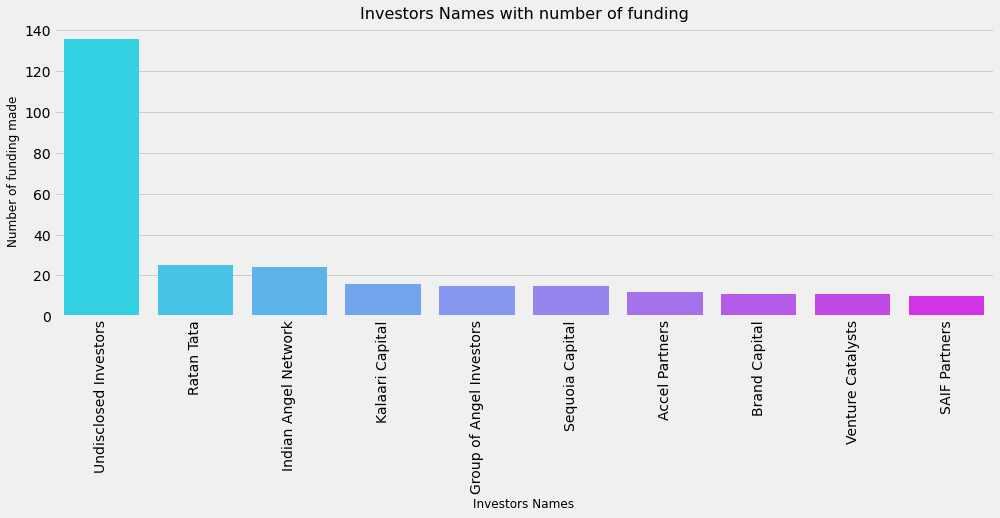

In [44]:
# lets analyze the investors in startup

# lets clean the dataset
data['InvestorsName'][data['InvestorsName']=='Undisclosed investors']='Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='undisclosed Investors']='Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='undisclosed investors']='Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='Undisclosed investor']='Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='Undisclosed Investor']='Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='Undisclosed']='Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='nan']='Undisclosed Investors'

# lets check the value count
investors = data['InvestorsName'].value_counts().head(10)
print(investors)

# lets plot the data
sns.barplot(investors.index,investors.values,palette='cool')
plt.xticks(rotation = 'vertical')
plt.xlabel('Investors Names',fontsize=12)
plt.ylabel('Number of funding made',fontsize=12)
plt.title('Investors Names with number of funding',fontsize=16)
plt.show()



# What are the different Types of Funding for Startups?

Private Equity        1357
Seed Funding          1355
Seed Angel Funding     138
Seed\\nFunding          30
Debt Funding            25
Series A                24
Series B                20
Series C                14
Series D                12
Seed Round               7
Name: InvestmentType, dtype: int64


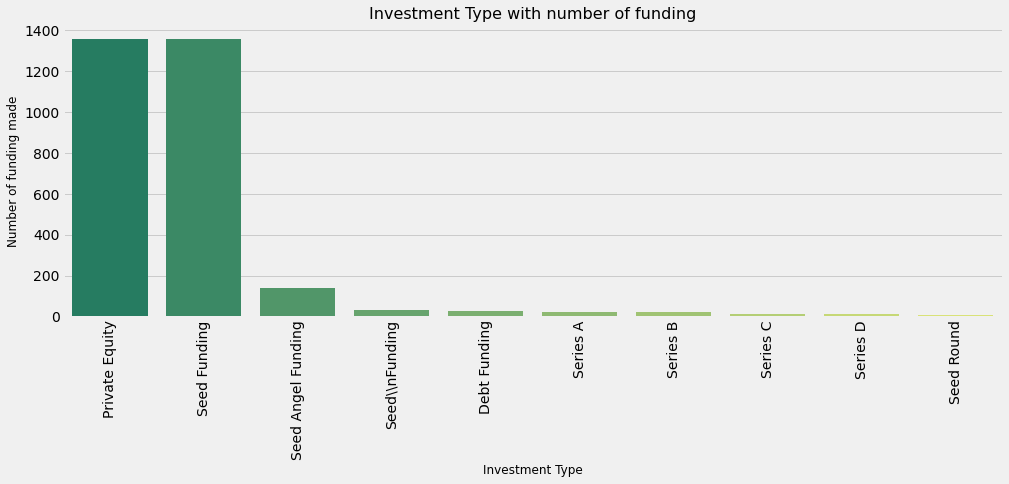

In [46]:
# lets analyze the investment
investment = data['InvestmentType'].value_counts().head(10)
print(investment)

# lets clean the dataset
data['InvestmentType'][data['InvestmentType'] == 'SeedFunding'] = 'Seed Funding'
data['InvestmentType'][data['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'
data['InvestmentType'][data['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'
data['InvestmentType'][data['InvestmentType'] == 'Seed/ Angel Funding'] = 'Seed Angel Funding'
data['InvestmentType'][data['InvestmentType'] == 'Seed/Angel Funding'] = 'Seed Angel Funding'
data['InvestmentType'][data['InvestmentType'] == 'Seed / Angel Funding'] = 'Seed Angel Funding'
data['InvestmentType'][data['InvestmentType'] == 'Angel / Seed Funding'] = 'Seed Angel Funding'

# lets plot the data
sns.barplot(investment.index,investment.values,palette='summer')
plt.xticks(rotation = 'vertical')
plt.xlabel('Investment Type',fontsize=12)
plt.ylabel('Number of funding made',fontsize=12)
plt.title('Investment Type with number of funding',fontsize=16)
plt.show()
